**Benchmark testing**

In [2]:
from imports import *
from classes import NeuralNetwork, GradientDescent
#from functions import mse, cross_entropy, mse_der, sigmoid, sigmoid_der, reLU, ReLU_der, identity, identity_der, accuracy, cross_entropy, polynomial_features
from functions import *
import classes
import functions
import imports
import importlib

importlib.reload(classes) 
importlib.reload(functions)
importlib.reload(imports)

<module 'imports' from 'c:\\Users\\Jogga\\Documents\\H25\\FYS-STK4155\\FYS-STK4155_coursework\\Project-2\\Code\\imports.py'>

Testing gradients with Autograd. Optional, but a good way of testing backpropagation

In [2]:
import sys
print(sys.executable)

C:\Users\Jogga\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe


Comparing our network with Pytorch

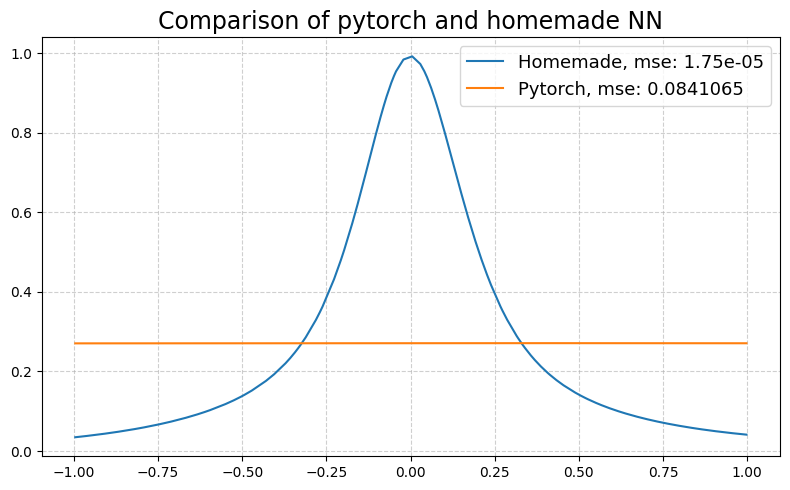

In [4]:
X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(noise_std=0.0)


Xtr = torch.from_numpy(X_train.astype(np.float32))
ytr = torch.from_numpy(y_train.reshape(-1, 1).astype(np.float32))
Xte = torch.from_numpy(X_test.astype(np.float32))

torch.manual_seed(50)
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 16),
    nn.Sigmoid(),
    nn.Linear(16, 16),
    nn.Sigmoid(),
    nn.Linear(16,1),
    nn.Identity()
)

optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-5)
loss_fn = nn.MSELoss()

for epoch in range(2000):
    optimizer.zero_grad()
    pred = model(Xtr)
    loss = loss_fn(pred, ytr)
    loss.backward()
    optimizer.step()



with torch.no_grad():
    y_pred_torch = model(Xte).numpy()

LinReg = NeuralNetwork(1, [16,16,1], [sigmoid]*2 + [identity], [sigmoid_der]*2 +[identity_der], mse, mse_der, l1=True, lam=1e-5)
LinReg.train_SGD(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.01, functional=NN_ADAM)
y_pred = LinReg.feed_forward(X_test)

sort_indices = np.argsort(x_test.flatten())

mseTorch = round(mse(y_pred_torch, y_test),7)
mseHomemade = round(mse(y_pred, y_test),7)

fig, ax = plt.subplots(figsize=(8, 5))

plt.plot(x_test[sort_indices], y_pred[sort_indices], label=f"Homemade, mse: {mseHomemade}")
plt.plot(x_test[sort_indices], y_pred_torch[sort_indices], label=f"Pytorch, mse: {mseTorch}")

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")


ax.set_title("Comparison of pytorch and homemade NN", fontsize=17)
ax.legend(fontsize=13)
ax.grid(True, linestyle="--", alpha=0.6)
fig.tight_layout()

Comparing the network with Scikit-learn or tensorflow? Might suffice to show with Pytorch

C:\Users\Jogga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


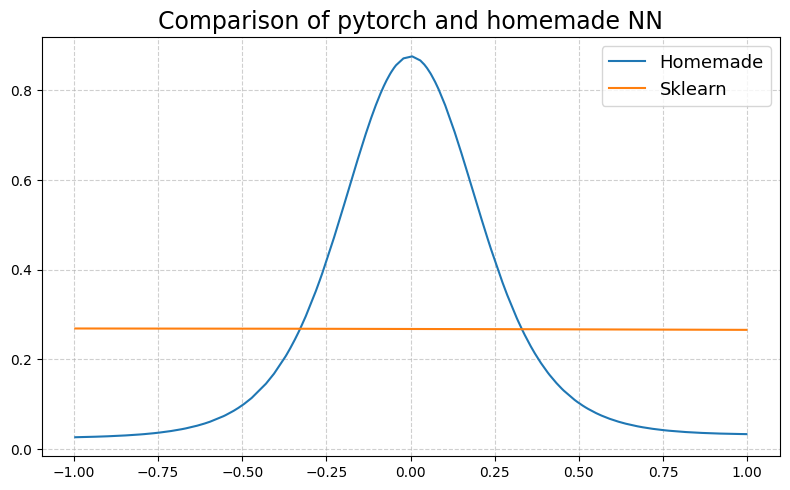

In [13]:
X_train, X_test, Y_train, Y_test, x_train, x_test, y_train, y_test = create_and_scale_data(noise_std=0.0)


LinReg = NeuralNetwork(1, [16,16,1], [sigmoid]*2 + [identity], [sigmoid_der]*2 +[identity_der], mse, mse_der, l2=True, lam=1e-4)
LinReg.train_SGD(X_train, y_train, epochs=2000, batch_size=32, learning_rate=0.01, functional=NN_ADAM)
y_pred = LinReg.feed_forward(X_test)

sort_indices = np.argsort(x_test.flatten())

model = MLPRegressor(
    hidden_layer_sizes=(16, 16),
    activation='logistic',   # sigmoid
    solver='sgd',
    learning_rate_init=0.01,
    max_iter=2000,
    random_state=50
)

model.fit(X_train, y_train)

# Predict and evaluate
y_pred_sklearn = model.predict(X_test)

fig, ax = plt.subplots(figsize=(8, 5))

plt.plot(x_test[sort_indices], y_pred[sort_indices], label=f"Homemade")
plt.plot(x_test[sort_indices], y_pred_sklearn[sort_indices], label=f"Sklearn")

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")


ax.set_title("Comparison of pytorch and homemade NN", fontsize=17)
ax.legend(fontsize=13)
ax.grid(True, linestyle="--", alpha=0.6)
fig.tight_layout()